# Part 1 Linear regression


## Importing Libraries

In [188]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv('zuucrew.csv')
df.head()



,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [190]:
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [191]:
X = df['TotalHours'].values
y = df['CapstoneScore'].values

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

print(X, y)


[-0.46997415  1.49313718  0.74798702 -1.2151243   1.20566808  1.55743948
 -1.1205621   0.04066175 -0.27328477 -0.75366076  0.33947831 -1.26807914
 -0.74987827 -0.19385252  0.00661935 -1.52150584  1.54230953 -1.41181369
 -0.05768294  1.34940263  0.50969027 -0.68179348 -1.11677961  1.55743948
  1.4553123  -1.07895473 -0.63640362 -0.82174554 -0.53049396 -0.78770315
  1.6141768  -1.06760727 -1.7257602   0.6609898   0.73663956  0.88037411
 -1.49124594 -0.61749118 -1.52907082  0.42647553  0.68368473  0.84633171
  0.16548385  0.88037411 -0.06524792  0.03309677 -0.28841472 -1.65767541
  0.42269305 -0.6742285   1.34562014 -0.8973953  -0.34893453  1.42126991
  0.41134558  1.22079804  1.29266531  0.08983409  1.00519621  1.03923861
 -1.72197771 -0.00472811 -0.32245711  1.46665976 -0.6439686   0.02174931
  0.64964233 -0.50779903  1.56500445 -0.77635568 -1.61985053 -0.03498801] [-0.58025407  1.40158225  0.60884773 -0.88788239  0.77449375  2.02275483
 -1.28424966 -0.02415671 -0.65716115 -0.65124522 -

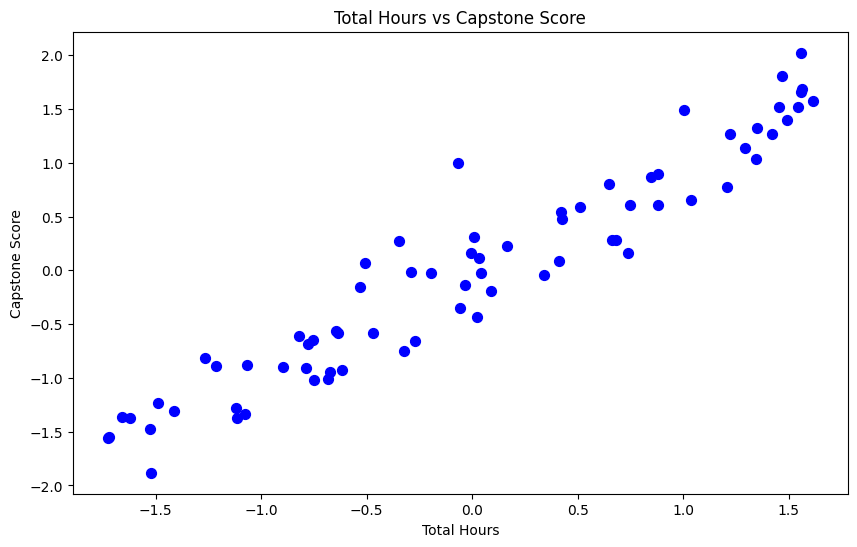

In [192]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=50)
plt.title('Total Hours vs Capstone Score')
plt.xlabel('Total Hours')
plt.ylabel('Capstone Score')
plt.show()

 #### Implementing linear regression

In [193]:
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    predictions = beta_0 + beta_1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost
   

In [194]:
compute_cost(X, y, 0, 2)

np.float64(0.5891053955946247)

In [195]:
def compute_gradient(X, y, beta_0, beta_1):
    m = len(y)
    predictions = beta_0 + beta_1 * X
    gradient_beta_0 = (1 / m) * np.sum(predictions - y) 
    gradient_beta_1 = (1 / m) * np.sum((predictions - y) * X)
    return gradient_beta_0, gradient_beta_1
    

In [196]:
compute_gradient(X, y, 0, 2)

(np.float64(-4.440892098500626e-16), np.float64(1.0445526977973123))

In [197]:
def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    beta_0 = 0
    beta_1 = 0
    
    for i in range(iterations):
        gradient_beta_0, gradient_beta_1 = compute_gradient(X, y, beta_0, beta_1)
        beta_0 -= learning_rate * gradient_beta_0
        beta_1 -= learning_rate * gradient_beta_1
        plt.scatter(beta_0,compute_cost(X, y, beta_0, beta_1))
        if i % 100 == 0:
            print(f"Iteration {i}: beta_0 = {beta_0}, beta_1 = {beta_1}, cost = {compute_cost(X, y, beta_0, beta_1)}, learning_rate = {learning_rate}")


    
    plt.xlabel('Slope (m)')
    plt.ylabel('Cost')
    plt.show()
        
    return beta_0, beta_1

    

In [198]:
# gradient_descent(X, y, learning_rate=0.01, iterations=1000)

In [199]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

Iteration 0: beta_0 = -6.784696261598179e-18, beta_1 = 0.09554473022026878, cost = 0.4132764430077926, learning_rate = 0.1
Iteration 100: beta_0 = 1.6514567491299184e-16, beta_1 = 0.9554244619874689, cost = 0.04356022661764073, learning_rate = 0.1
Iteration 200: beta_0 = 1.6637925605146423e-16, beta_1 = 0.9554473015960196, cost = 0.04356022635680302, learning_rate = 0.1
Iteration 300: beta_0 = 1.6761283718993665e-16, beta_1 = 0.9554473022026715, cost = 0.04356022635680302, learning_rate = 0.1
Iteration 400: beta_0 = 1.6545407019760997e-16, beta_1 = 0.9554473022026871, cost = 0.04356022635680302, learning_rate = 0.1
Iteration 500: beta_0 = 1.6668765133608236e-16, beta_1 = 0.9554473022026871, cost = 0.04356022635680302, learning_rate = 0.1
Iteration 600: beta_0 = 1.6422048905913757e-16, beta_1 = 0.9554473022026871, cost = 0.04356022635680302, learning_rate = 0.1
Iteration 700: beta_0 = 1.6545407019760997e-16, beta_1 = 0.9554473022026871, cost = 0.04356022635680302, learning_rate = 0.1
It

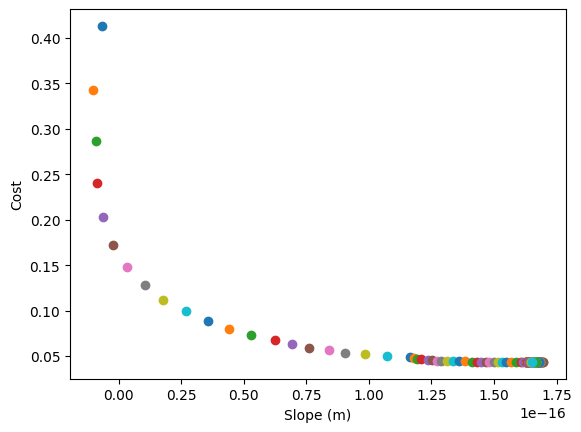

Final parameters: beta_0 = 1.6514567491299187e-16, beta_1 = 0.9554473022026871 learning_rate = 1.0


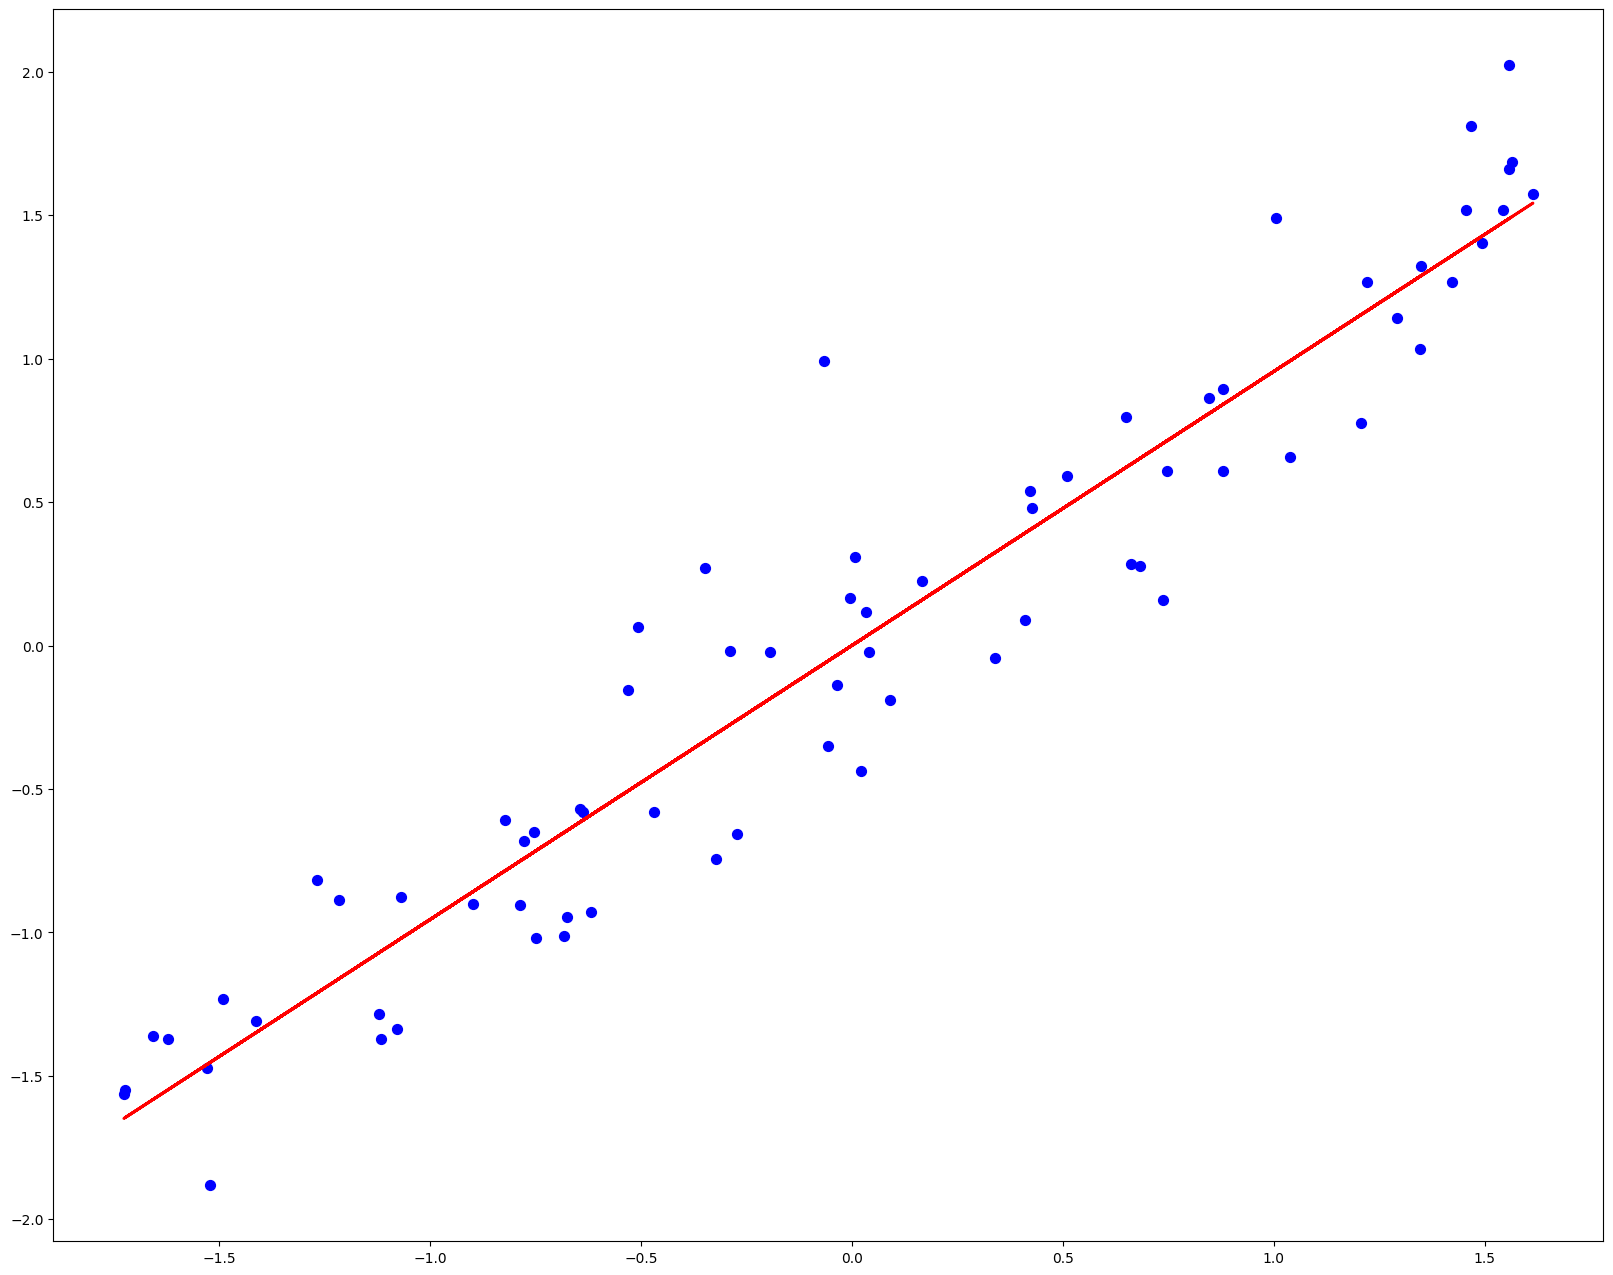

In [200]:
final_beta_0, final_beta_1 = gradient_descent(X, y, learning_rate=0.1, iterations=1000)
predictions = predict(X, final_beta_0, final_beta_1)

plt.figure(figsize=(20, 16))
plt.scatter(X, y, color='blue', s=50, label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')

print(f"Final parameters: beta_0 = {final_beta_0}, beta_1 = {final_beta_1} learning_rate = {1.0}")

## Evalution Metrices

In [201]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [202]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [1]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (ss_res / ss_tot)

In [205]:
print("MSE:", mean_squared_error(y, predictions))
print("MAE:", mean_absolute_error(y, predictions))
print("RMSE:", root_mean_squared_error(y, predictions))
print("R²:", r2_score(y, predictions))

MSE: 0.08712045271360605
MAE: 0.23279814684086306
RMSE: 0.2951617399217013
R²: 0.912879547286394
